In [1]:
# REFERENCE: https://sadanand-singh.github.io/posts/autoencoders/
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.argv=['']; del sys
import tensorflow as tf
import pickle

from autoencoder import AUTOENCODER
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.models import model_from_json
from input_data import read_tfrecord_for_ae
from param import parse_argument
from generator import generate_image_for_pickle

Using TensorFlow backend.


# Simple Autoencoder

In [3]:
args = parse_argument()
ae = AUTOENCODER(args, 120, 40, 10)

(?, 40)
(40, 120)


In [4]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()
MODELNAME = './autoencoder/checkpoints/model-99000'

INFO:tensorflow:Restoring parameters from ./stroke_autoencoder20181210016/checkpoints/model-52000


/usr/lib64/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


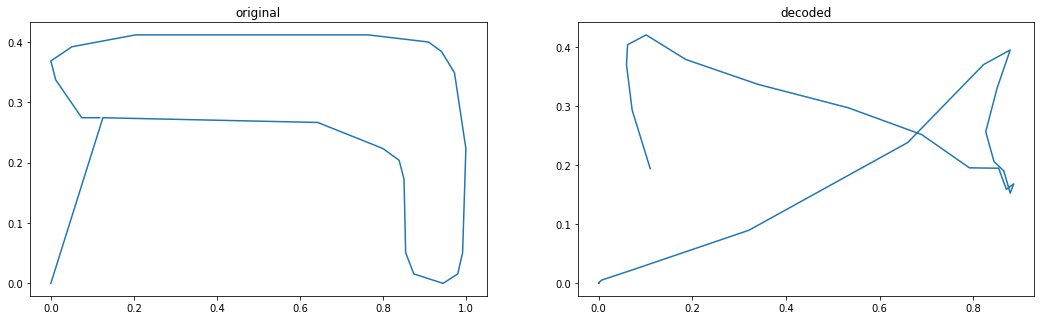

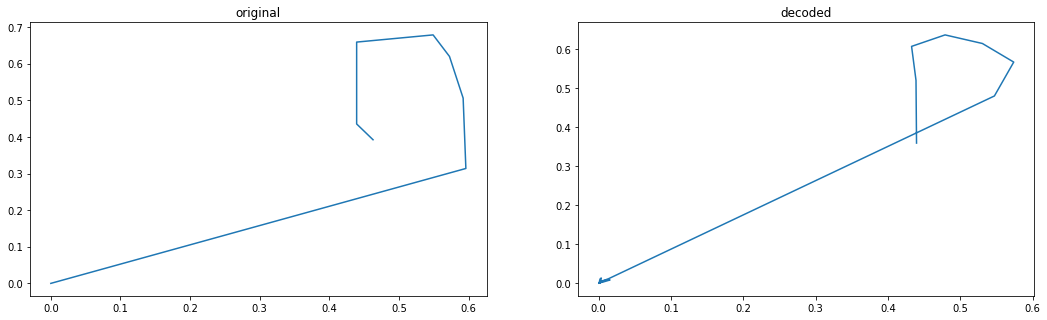

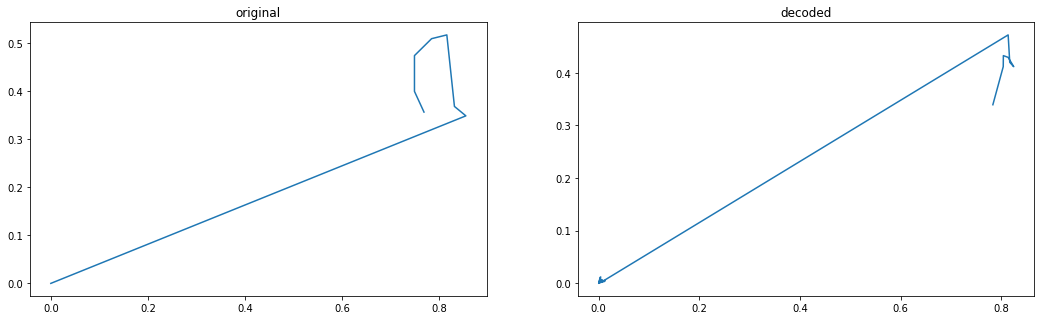

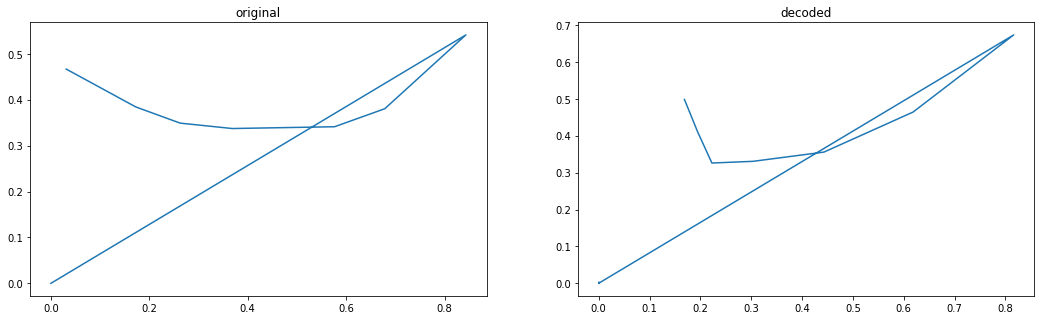

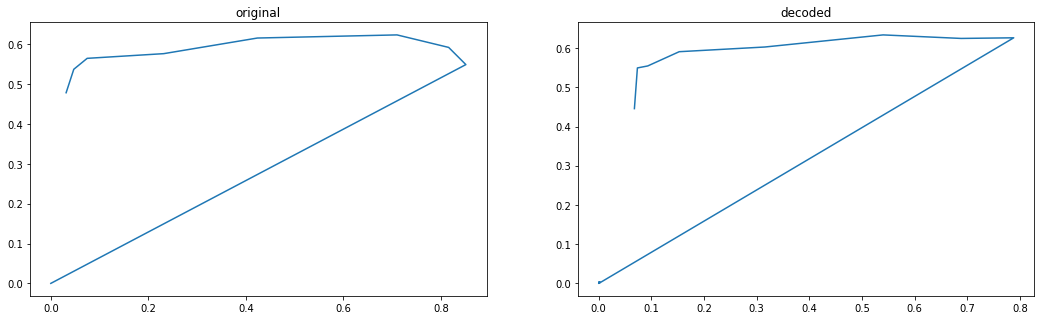

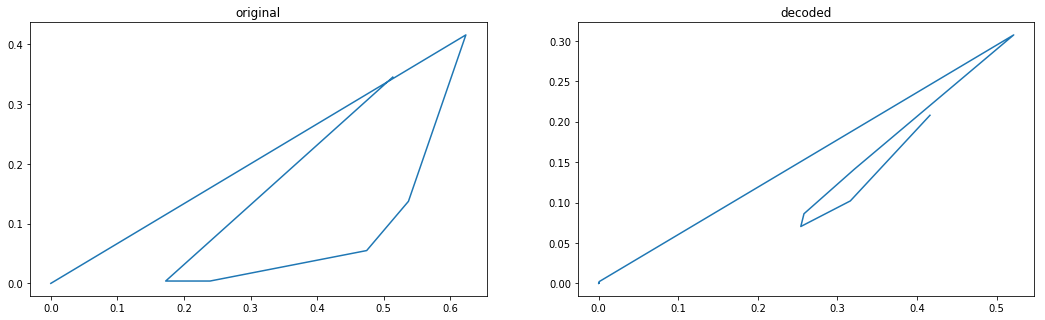

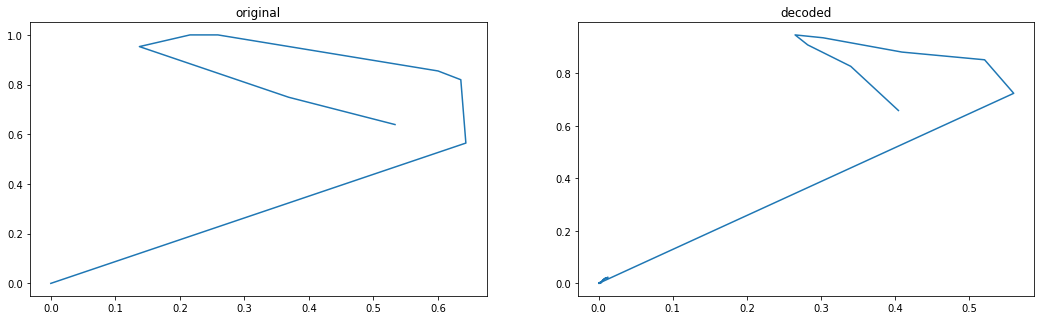

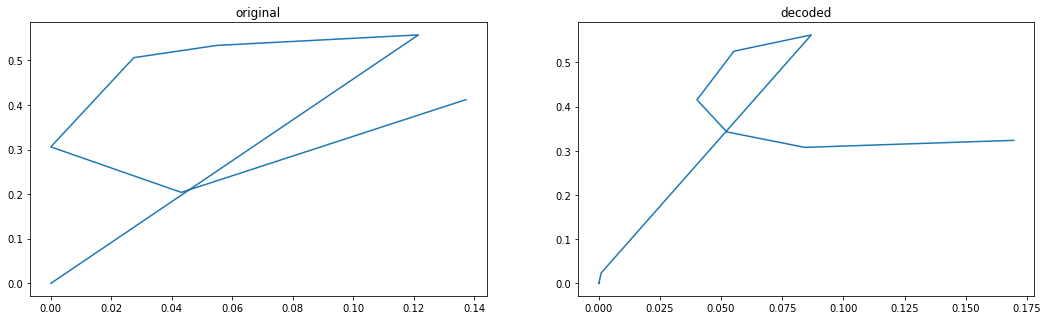

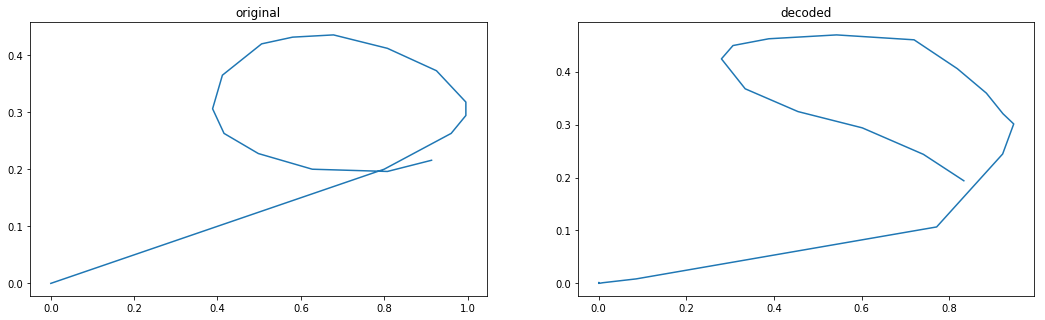

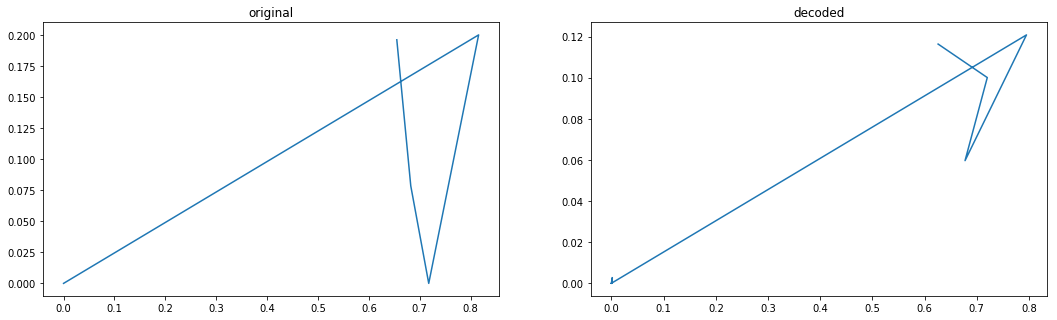

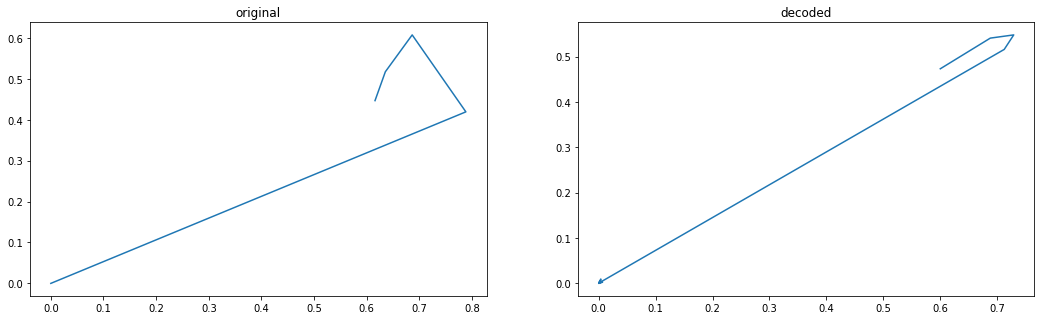

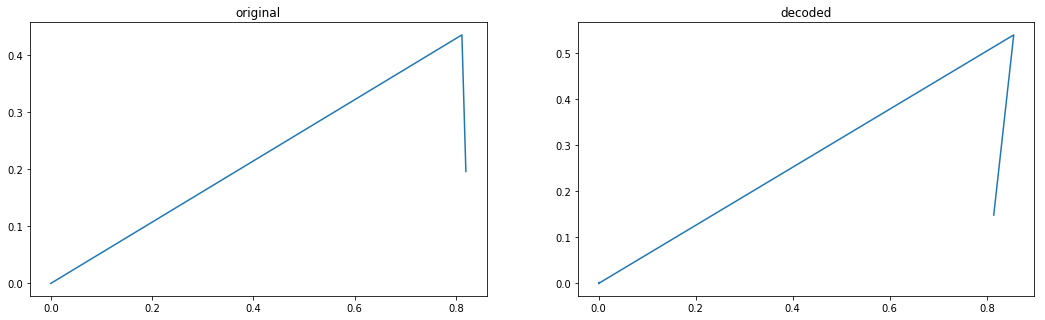

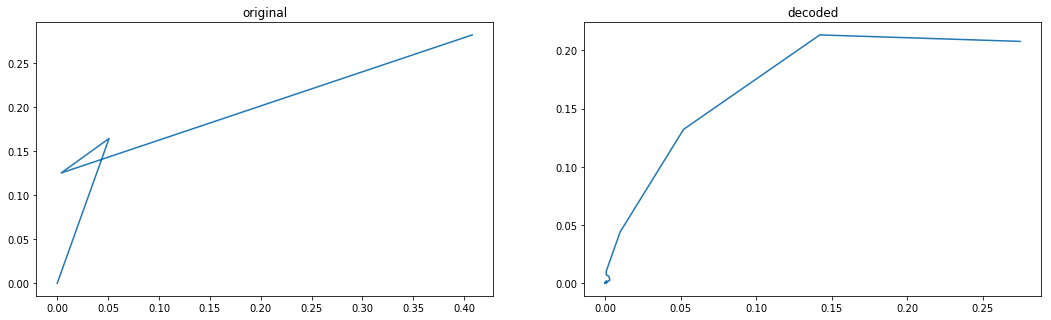

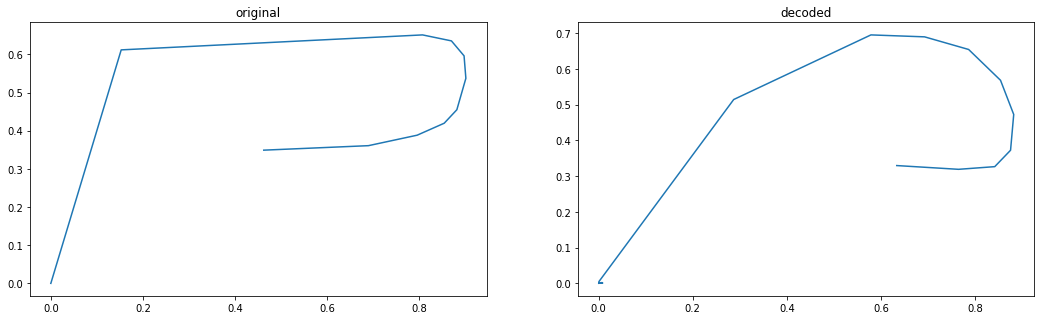

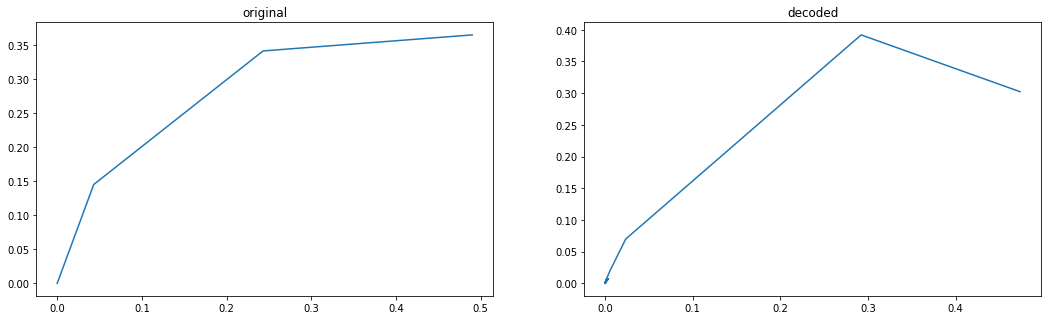

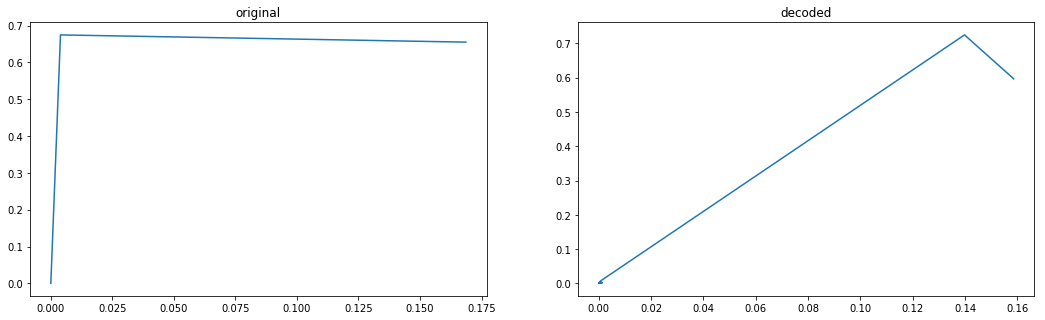

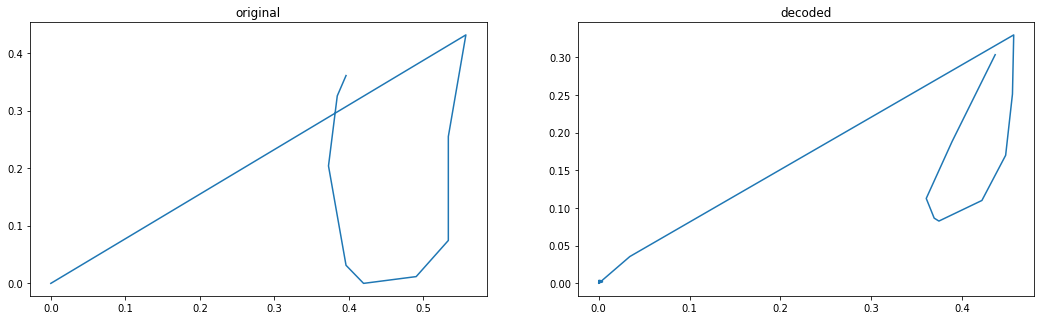

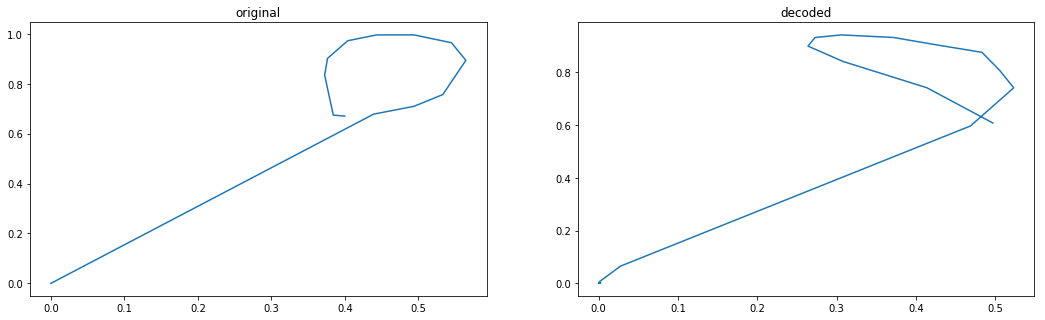

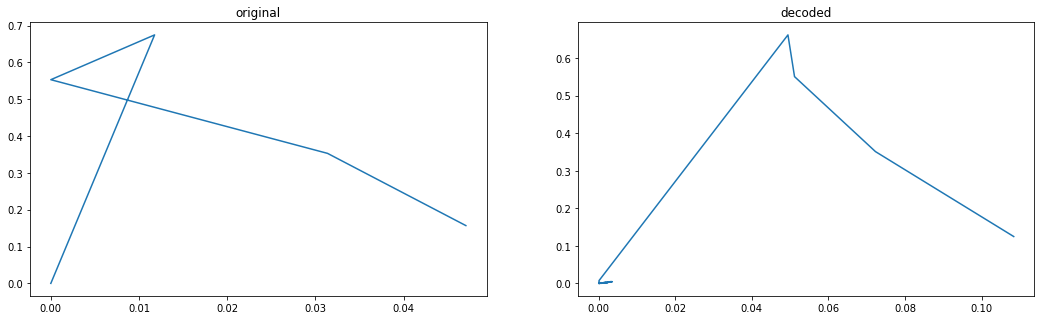

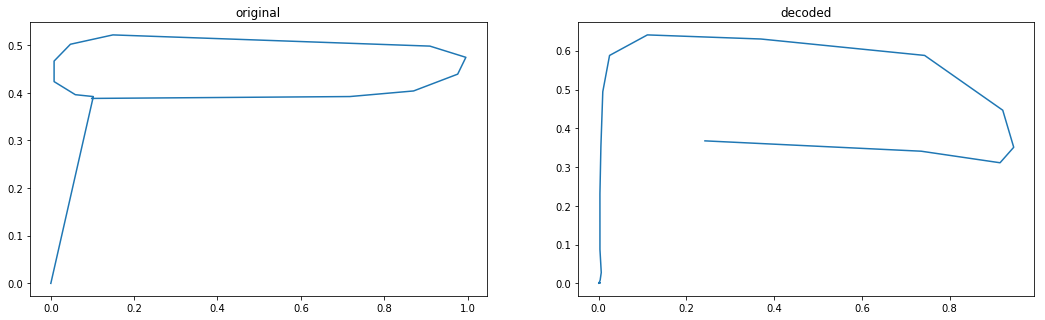

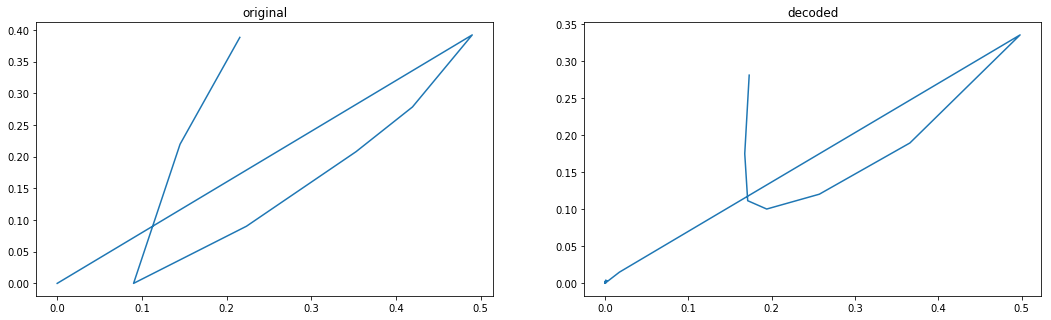

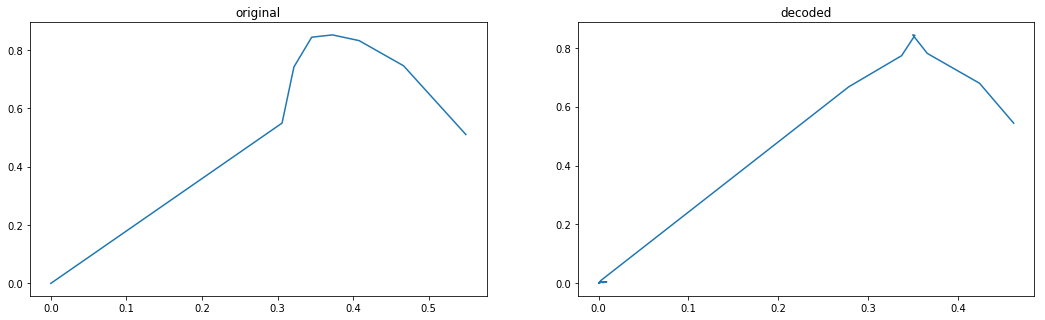

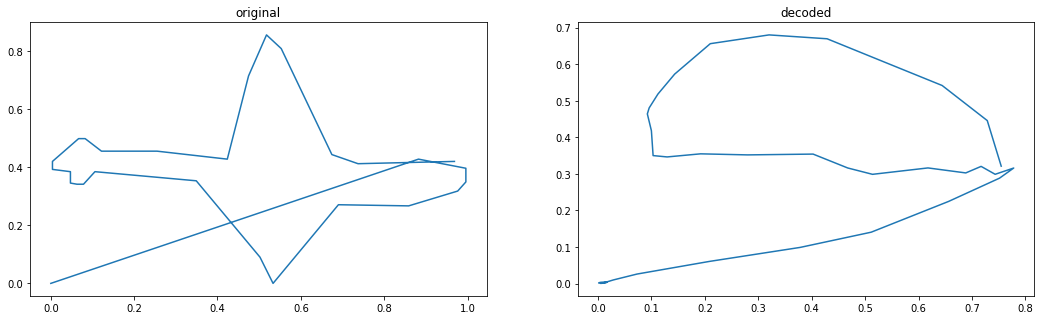

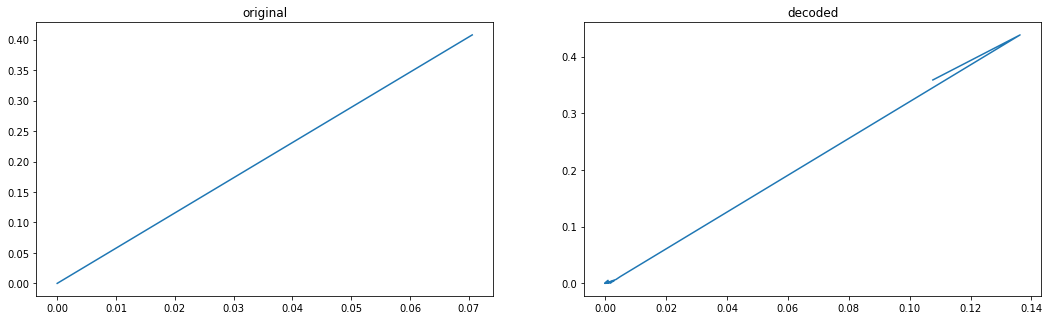

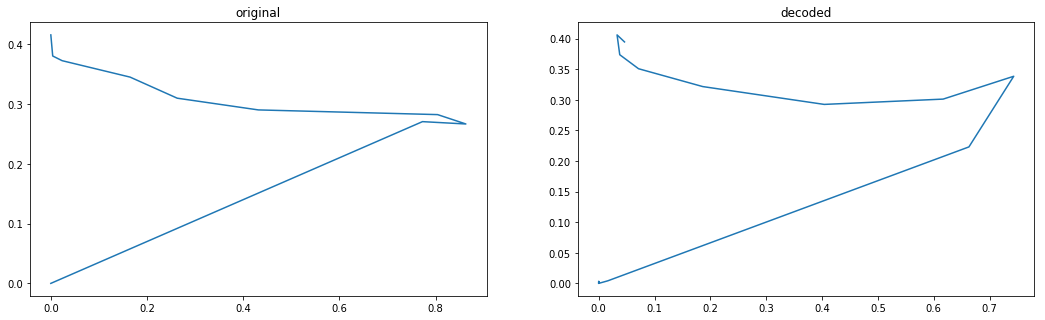

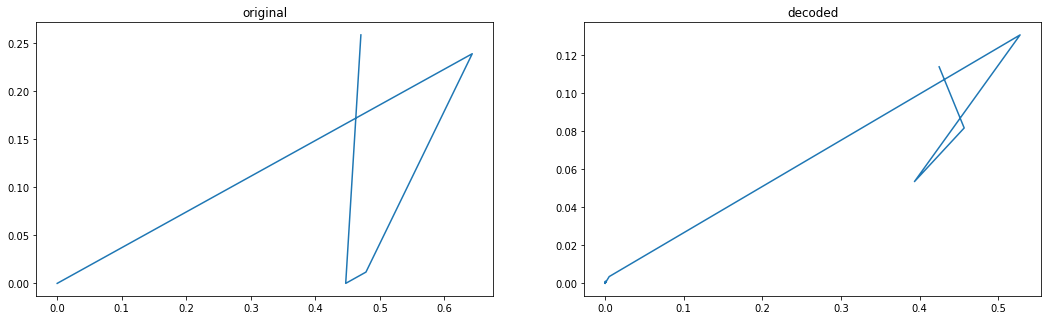

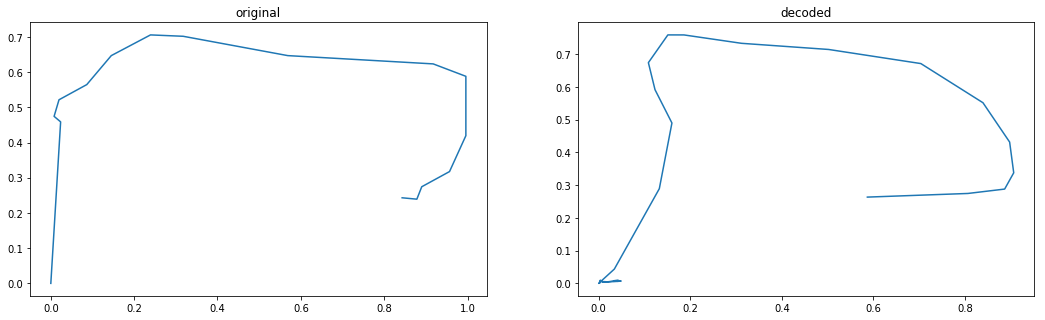

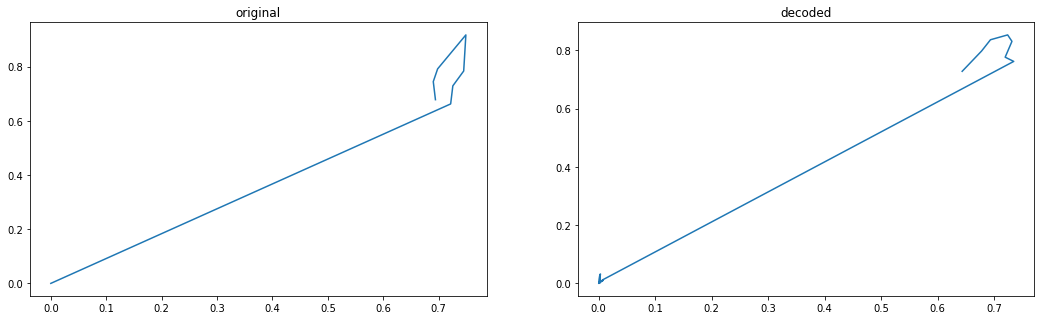

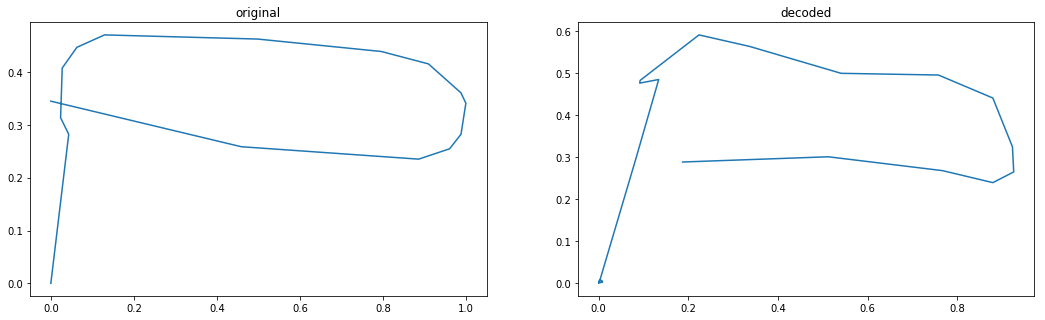

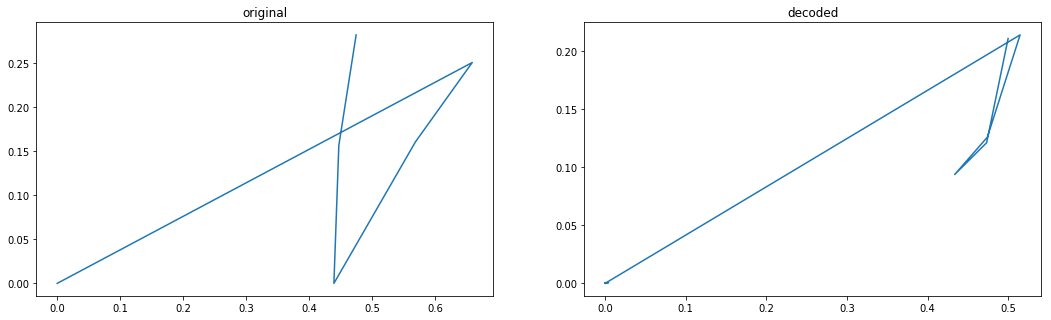

In [5]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, MODELNAME)
    
    # (?, 120) -> 
    original, decoded, reallen = sess.run([ae.input_x, ae.decoded, ae.reallen])
    original_x = original[:,:60]
    original_y = original[:,60:]
    #original = np.stack([original_x, original_y], axis=2)
    #plt.plot(original_x[0][:reallen[0]], original_y[0][:reallen[0]])
    
    decoded_x = decoded[:,:60]
    decoded_y = decoded[:,60:]
    #original = np.stack([original_x, original_y], axis=2)
    #plt.plot(decoded_x[0][:reallen[0]], decoded_y[0][:reallen[0]])
    
    idx = 0
    N = 30
    iteration_list = list(map(lambda x: 2*x + 1, range(N)))
    for i, idx in enumerate(iteration_list):
        fig=plt.figure(figsize=(18, 180))

        # plot images
        plt.subplot(N, 2, idx)
        plt.plot(original_x[i], original_y[i])
        plt.title('original')

        # plot decoded images
        plt.subplot(N, 2, idx+1)
        plt.plot(decoded_x[i], decoded_y[i])
        plt.title('decoded')

# autoencoder for image

In [2]:
args = parse_argument()
ae_param = {
    'args': args,
    'n_hid_1': 1000,
    'n_hid_2': 100,
    'size': 64,
}
ae = AUTOENCODER(**ae_param)

In [3]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()
MODELNAME = './autoencoder/checkpoints/model-99000'

In [4]:
gen = generate_image_for_pickle(bchsize=5000, ks=range(99))
num_to_label_dict = pickle.load(open('num_to_label_dict.pkl','rb'))
label_to_num_dict = pickle.load(open('label_to_num_dict.pkl','rb'))

INFO:tensorflow:Restoring parameters from ./autoencoder/checkpoints/model-99000
(13, 64, 64, 1)
(13, 340)
ice cream


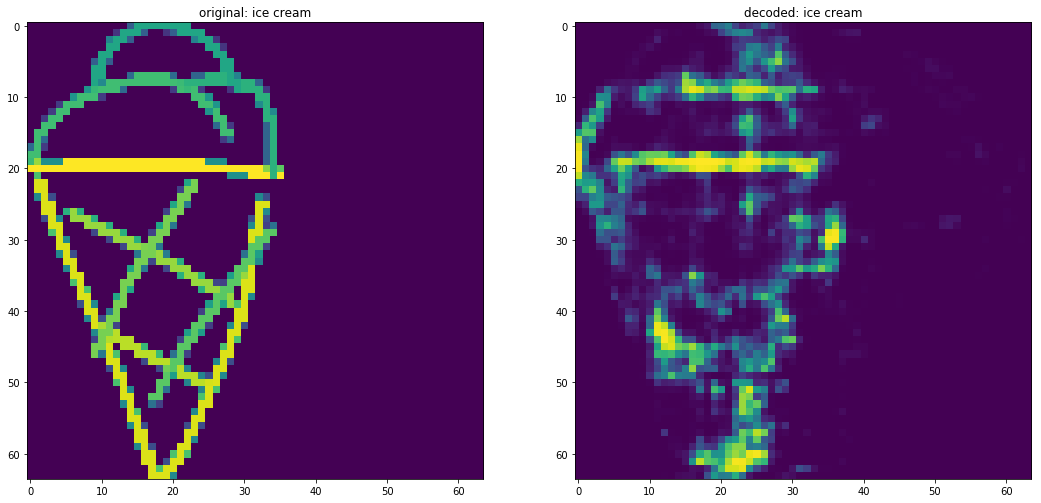

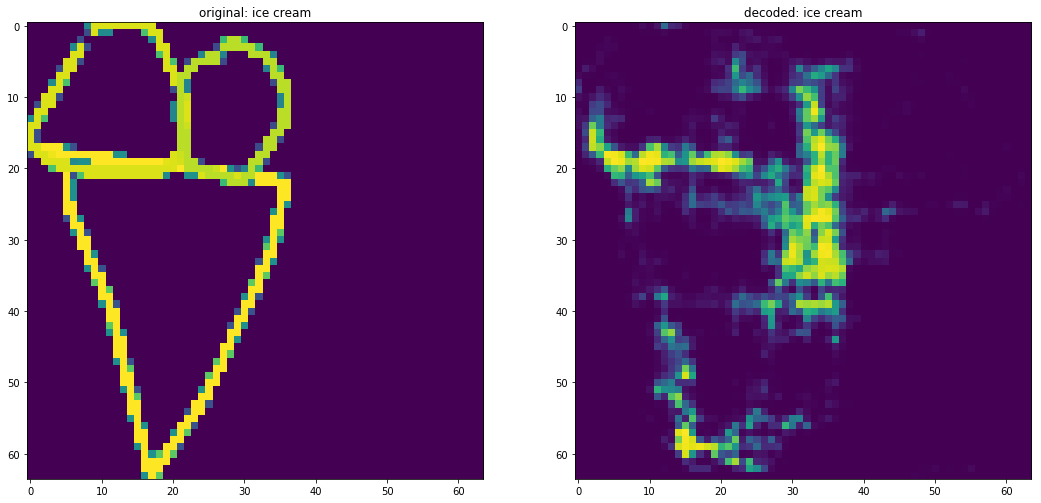

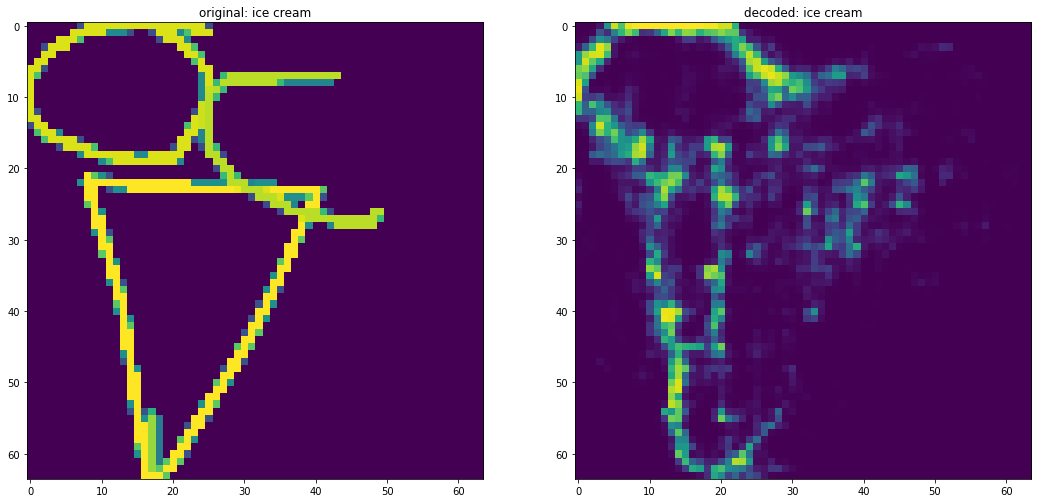

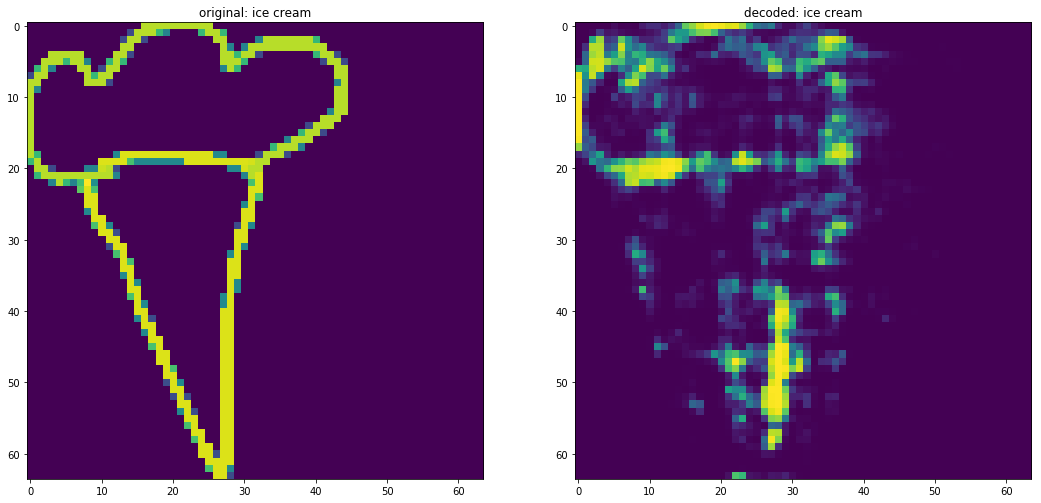

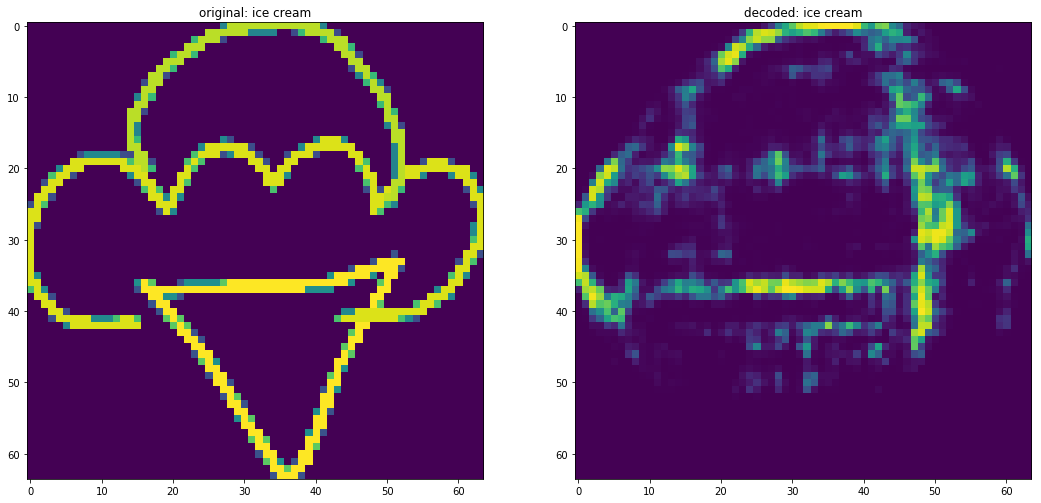

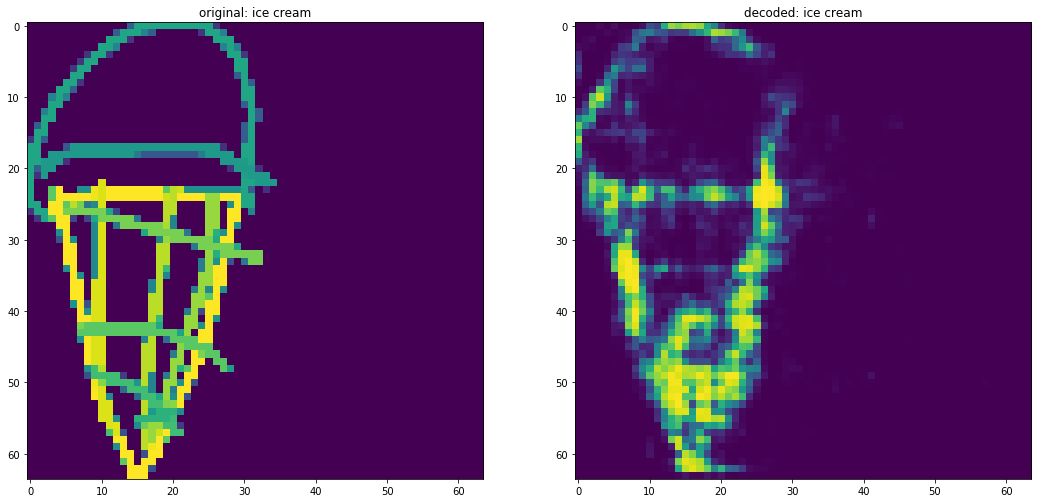

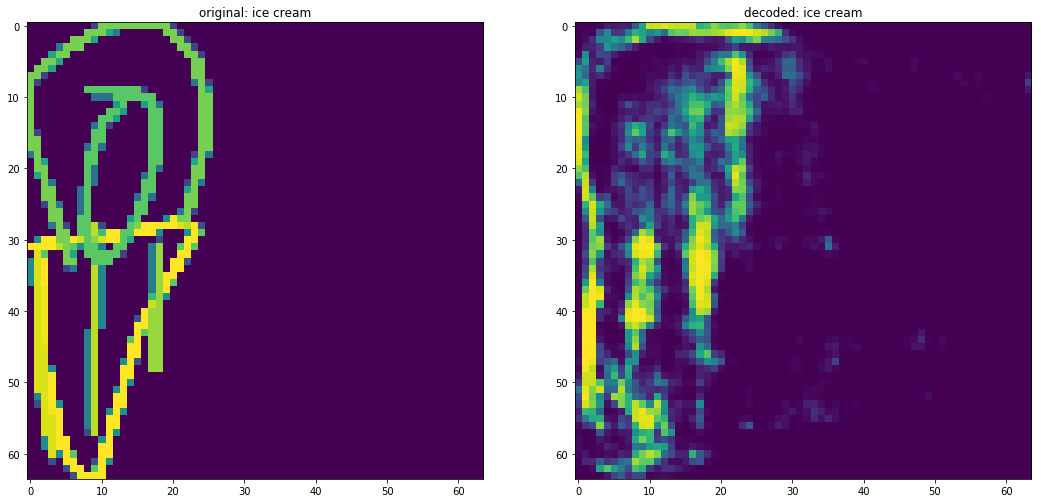

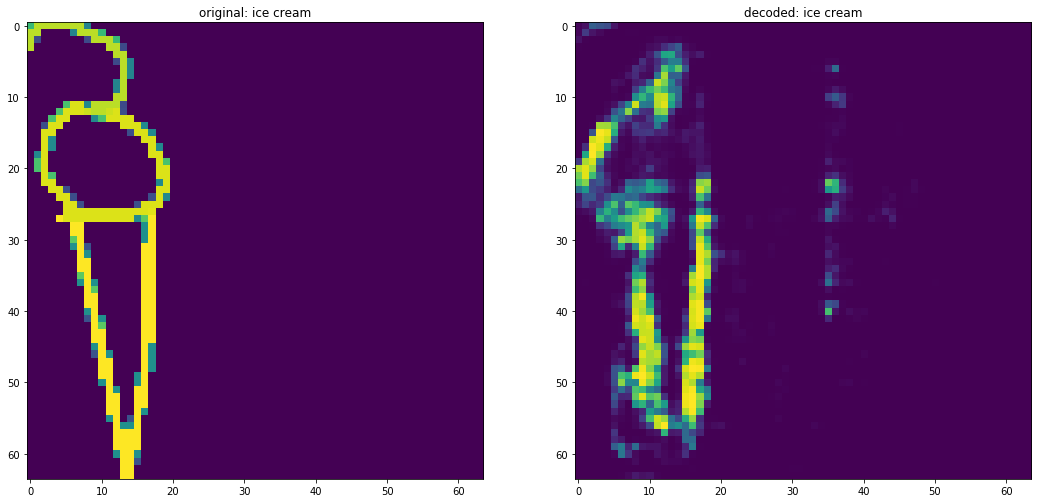

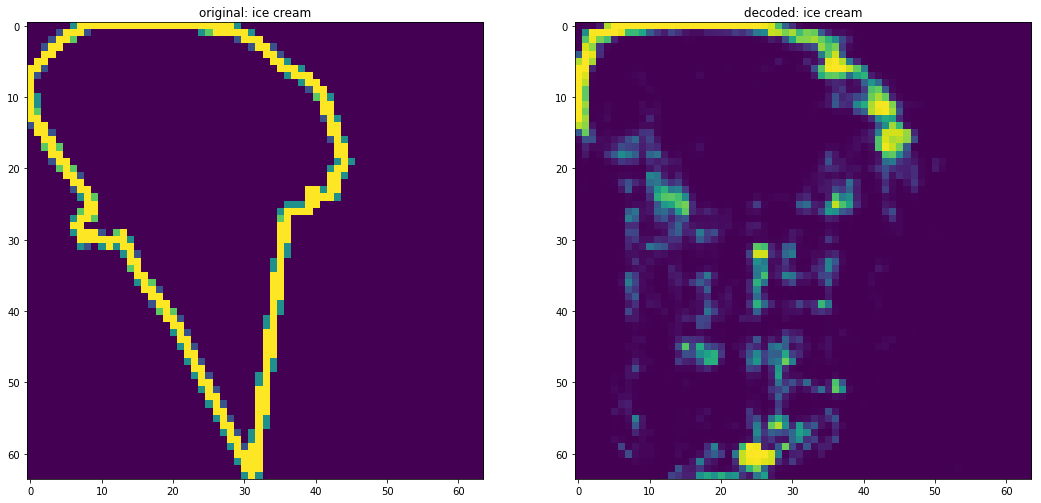

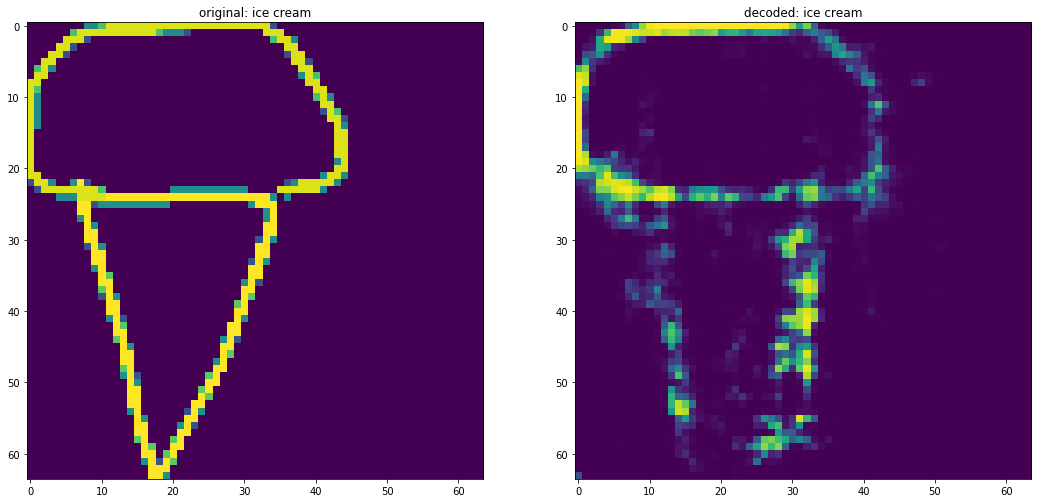

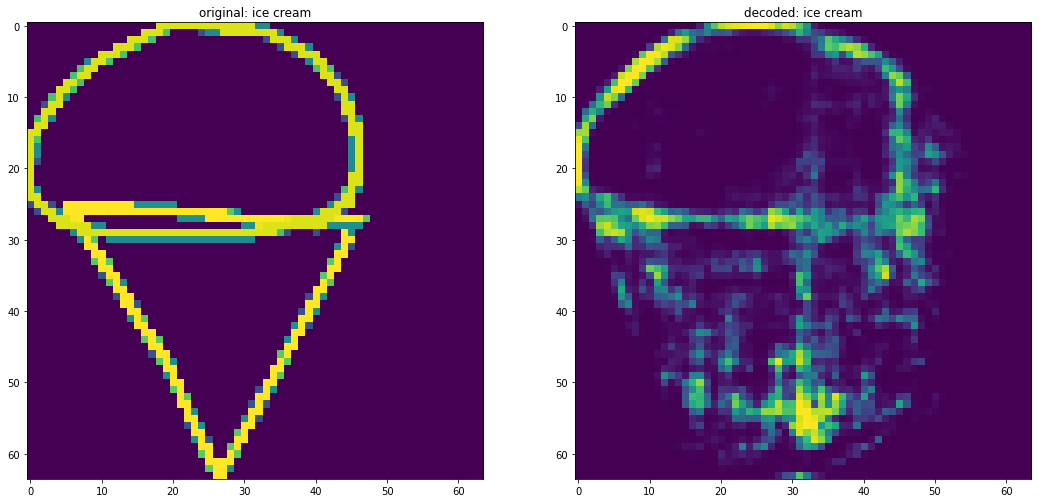

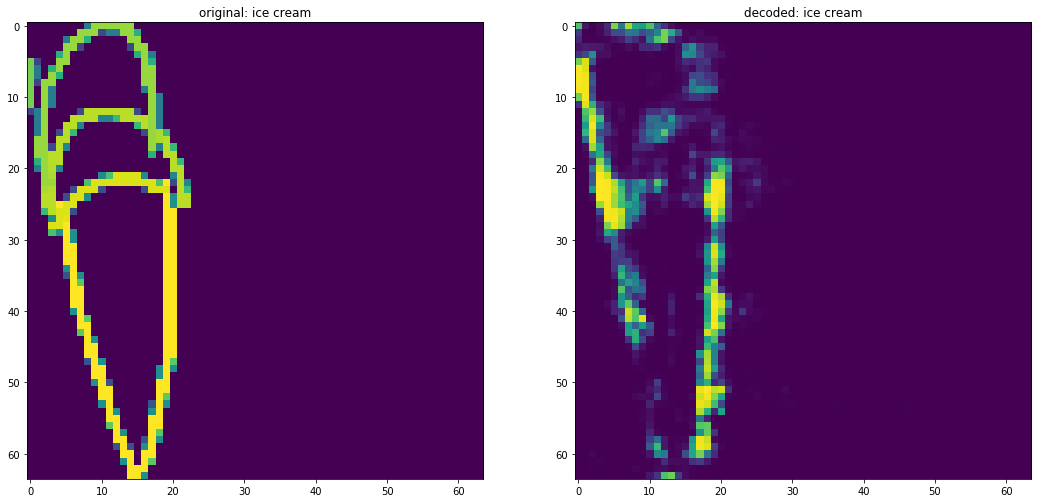

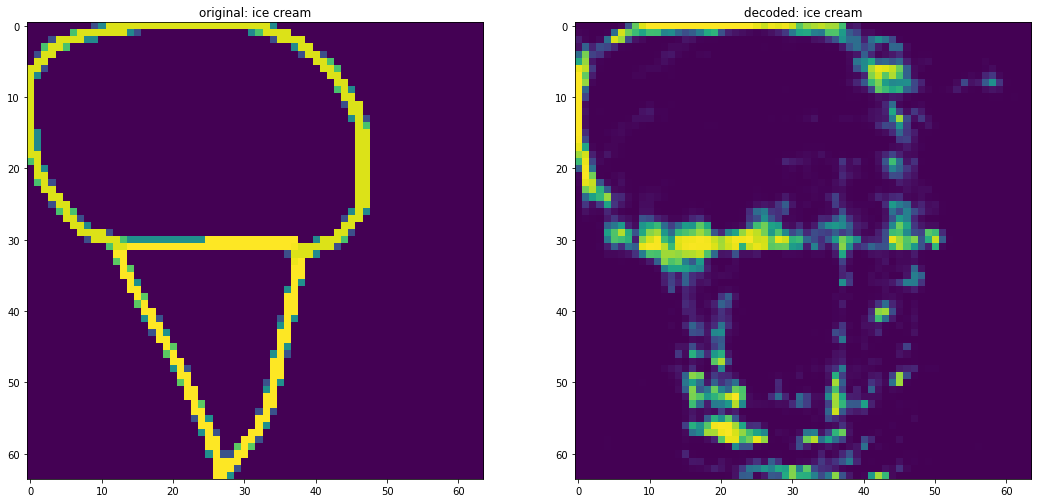

In [9]:
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, MODELNAME)
    
    
    # (?, 120) -> 
    _, batch_x, batch_y = next(gen)
    
    # filter out only specific images
    image_index = 155
    idx = np.argmax(batch_y, axis=1) == image_index
    batch_x = batch_x[idx]
    batch_y = batch_y[idx]
    
    feed_dict = {
        ae.data: batch_x
    }
    original, decoded = sess.run([ae.input_x, ae.decoded], feed_dict=feed_dict)
    original = np.reshape(original, [-1, 64, 64])
    decoded = np.reshape(decoded, [-1, 64, 64])
    name = num_to_label_dict[image_index]
    
    #plt.imshow(original[0])
    idx = 0
    N = batch_x.shape[0]
    iteration_list = list(map(lambda x: 2*x + 1, range(N)))
    for i, idx in enumerate(iteration_list):
        fig=plt.figure(figsize=(18, 180))

        # plot images
        plt.subplot(N, 2, idx)
        plt.imshow(original[i])
        plt.title('original: %s' % name)

       # plot decoded images
        plt.subplot(N, 2, idx+1)
        plt.imshow(decoded[i])
        plt.title('decoded: %s' % name)
        
    print(batch_x.shape)
    print(batch_y.shape)
    print(name)

In [7]:
num_to_label_dict[70]

'circle'